In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import string
import os

In [0]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


import xml

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

/bin/bash: conda: command not found
/bin/bash: conda: command not found
Libraries imported.


In [0]:
F1=pd.read_csv("chefmozaccepts.csv")
F2=pd.read_csv("chefmozcuisine.csv")
F3=pd.read_csv("chefmozhours4.csv")
F4=pd.read_csv("chefmozparking.csv")
F5=pd.read_csv("usercuisine.csv")
F6=pd.read_csv("userpayment.csv")
F7=pd.read_csv("userprofile.csv")
F8=pd.read_csv("geoplaces2.csv")

T=pd.read_csv("rating_final.csv")


## Data Preprocessing

### Let's first inspect each of these data frames


In [0]:
F1.head()

,placeID,Rpayment
0,135110,cash
1,135110,VISA
2,135110,MasterCard-Eurocard
3,135110,American_Express
4,135110,bank_debit_cards


In [0]:
F1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 2 columns):
placeID     1314 non-null int64
Rpayment    1314 non-null object
dtypes: int64(1), object(1)
memory usage: 20.6+ KB


In [0]:
F2.head()

,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food


In [0]:
F2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 2 columns):
placeID     916 non-null int64
Rcuisine    916 non-null object
dtypes: int64(1), object(1)
memory usage: 14.4+ KB


Text(0, 0.5, 'count')

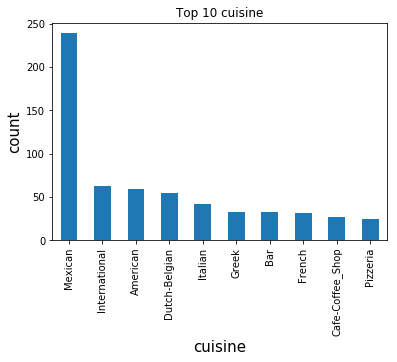

In [0]:
#plot to visualize top cuisines offered by the restaurants
F2plt=F2.Rcuisine.value_counts()[:10].plot.bar(title="Top 10 cuisine")
F2plt.set_xlabel('cuisine',size=15)
F2plt.set_ylabel('count',size=15)

In [0]:
#creating dummy variables for different cuisines.
F2dum = pd.get_dummies(F2,columns=['Rcuisine'])
F2dum1 = F2dum.groupby('placeID',as_index=False).sum()
len(F2dum1)

769

In [0]:
F2dum1.head()

,placeID,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Asian,Rcuisine_Bagels,Rcuisine_Bakery,Rcuisine_Bar,Rcuisine_Bar_Pub_Brewery,Rcuisine_Barbecue,Rcuisine_Brazilian,Rcuisine_Breakfast-Brunch,Rcuisine_Burgers,Rcuisine_Cafe-Coffee_Shop,Rcuisine_Cafeteria,Rcuisine_California,Rcuisine_Caribbean,Rcuisine_Chinese,Rcuisine_Contemporary,Rcuisine_Continental-European,Rcuisine_Deli-Sandwiches,Rcuisine_Dessert-Ice_Cream,Rcuisine_Diner,Rcuisine_Dutch-Belgian,Rcuisine_Eastern_European,Rcuisine_Ethiopian,Rcuisine_Family,Rcuisine_Fast_Food,Rcuisine_Fine_Dining,Rcuisine_French,Rcuisine_Game,Rcuisine_German,Rcuisine_Greek,Rcuisine_Hot_Dogs,Rcuisine_International,Rcuisine_Italian,Rcuisine_Japanese,Rcuisine_Juice,Rcuisine_Korean,Rcuisine_Latin_American,Rcuisine_Mediterranean,Rcuisine_Mexican,Rcuisine_Mongolian,Rcuisine_Organic-Healthy,Rcuisine_Persian,Rcuisine_Pizzeria,Rcuisine_Polish,Rcuisine_Regional,Rcuisine_Seafood,Rcuisine_Soup,Rcuisine_Southern,Rcuisine_Southwestern,Rcuisine_Spanish,Rcuisine_Steaks,Rcuisine_Sushi,Rcuisine_Thai,Rcuisine_Turkish,Rcuisine_Vegetarian,Rcuisine_Vietnamese
0,132001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,132002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,132003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,132004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,132005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [0]:
F3.head()

,placeID,hours,days
0,135111,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;
1,135111,00:00-23:30;,Sat;
2,135111,00:00-23:30;,Sun;
3,135110,08:00-19:00;,Mon;Tue;Wed;Thu;Fri;
4,135110,00:00-00:00;,Sat;


In [0]:
F3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
placeID    2339 non-null int64
hours      2339 non-null object
days       2339 non-null object
dtypes: int64(1), object(2)
memory usage: 54.9+ KB


In [0]:
F4.head()

,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none
3,135108,none
4,135107,none


Text(0, 0.5, 'count')

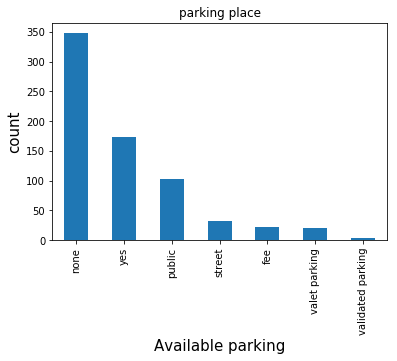

In [0]:
#plot to visualize available parking place at the Restaurants
F4plt=F4.parking_lot.value_counts().plot.bar(title="parking place")
F4plt.set_xlabel('Available parking',size=15)
F4plt.set_ylabel('count',size=15)

In [0]:
#creating dummy variables for different parking lots.
F4dum = pd.get_dummies(F4,columns=['parking_lot'])
F4dum1 = F4dum.groupby('placeID',as_index=False).sum()
len(F4dum1)

675

In [0]:
F4dum1.head()

,placeID,parking_lot_fee,parking_lot_none,parking_lot_public,parking_lot_street,parking_lot_valet parking,parking_lot_validated parking,parking_lot_yes
0,132012,0,0,1,1,0,0,0
1,132023,1,0,1,0,0,0,0
2,132024,0,0,0,1,0,0,0
3,132026,1,0,0,0,0,0,0
4,132030,0,0,0,1,0,0,0


In [0]:
F5.head()

,userID,Rcuisine
0,U1001,American
1,U1002,Mexican
2,U1003,Mexican
3,U1004,Bakery
4,U1004,Breakfast-Brunch


In [0]:
F5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 2 columns):
userID      330 non-null object
Rcuisine    330 non-null object
dtypes: object(2)
memory usage: 5.2+ KB


Text(0, 0.5, 'count')

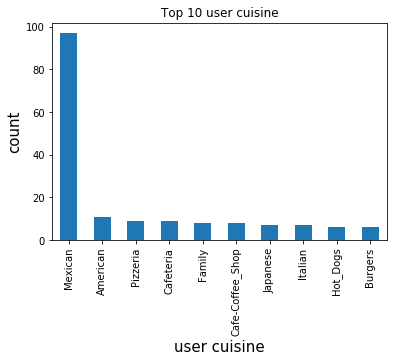

In [0]:
#Top 10 favorite cuisines for the customers
F5plt=F5.Rcuisine.value_counts()[:10].plot.bar(title="Top 10 user cuisine")
F5plt.set_xlabel('user cuisine',size=15)
F5plt.set_ylabel('count',size=15)

In [0]:
#creating dummy variables for differen usercuisines.
F5dum = pd.get_dummies(F5,columns=['Rcuisine'])
F5dum1 = F5dum.groupby('userID',as_index=False).sum()
len(F5dum1)

138

In [0]:
F5dum1.head()

,userID,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Asian,Rcuisine_Australian,Rcuisine_Austrian,Rcuisine_Bagels,Rcuisine_Bakery,Rcuisine_Bar,Rcuisine_Bar_Pub_Brewery,Rcuisine_Barbecue,Rcuisine_Basque,Rcuisine_Brazilian,Rcuisine_Breakfast-Brunch,Rcuisine_British,Rcuisine_Burgers,Rcuisine_Burmese,Rcuisine_Cafe-Coffee_Shop,Rcuisine_Cafeteria,Rcuisine_Cajun-Creole,Rcuisine_California,Rcuisine_Cambodian,Rcuisine_Canadian,Rcuisine_Caribbean,Rcuisine_Chilean,Rcuisine_Chinese,Rcuisine_Contemporary,Rcuisine_Continental-European,Rcuisine_Cuban,Rcuisine_Deli-Sandwiches,Rcuisine_Dessert-Ice_Cream,Rcuisine_Dim_Sum,Rcuisine_Diner,Rcuisine_Doughnuts,Rcuisine_Dutch-Belgian,Rcuisine_Eastern_European,Rcuisine_Eclectic,Rcuisine_Ethiopian,...,Rcuisine_Latin_American,Rcuisine_Lebanese,Rcuisine_Malaysian,Rcuisine_Mediterranean,Rcuisine_Mexican,Rcuisine_Middle_Eastern,Rcuisine_Mongolian,Rcuisine_Moroccan,Rcuisine_North_African,Rcuisine_Organic-Healthy,Rcuisine_Pacific_Northwest,Rcuisine_Pacific_Rim,Rcuisine_Persian,Rcuisine_Peruvian,Rcuisine_Pizzeria,Rcuisine_Polish,Rcuisine_Polynesian,Rcuisine_Portuguese,Rcuisine_Regional,Rcuisine_Romanian,Rcuisine_Russian-Ukrainian,Rcuisine_Scandinavian,Rcuisine_Seafood,Rcuisine_Soup,Rcuisine_Southeast_Asian,Rcuisine_Southern,Rcuisine_Southwestern,Rcuisine_Spanish,Rcuisine_Steaks,Rcuisine_Sushi,Rcuisine_Swiss,Rcuisine_Tapas,Rcuisine_Tea_House,Rcuisine_Tex-Mex,Rcuisine_Thai,Rcuisine_Tibetan,Rcuisine_Tunisian,Rcuisine_Turkish,Rcuisine_Vegetarian,Rcuisine_Vietnamese
0,U1001,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,U1002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,U1003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,U1004,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,U1005,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
F7.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


In [0]:
F7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 19 columns):
userID              138 non-null object
latitude            138 non-null float64
longitude           138 non-null float64
smoker              138 non-null object
drink_level         138 non-null object
dress_preference    138 non-null object
ambience            138 non-null object
transport           138 non-null object
marital_status      138 non-null object
hijos               138 non-null object
birth_year          138 non-null int64
interest            138 non-null object
personality         138 non-null object
religion            138 non-null object
activity            138 non-null object
color               138 non-null object
weight              138 non-null int64
budget              138 non-null object
height              138 non-null float64
dtypes: float64(3), int64(2), object(14)
memory usage: 20.6+ KB


In [0]:
# as data contains unknown value, we are replacinf with Nan.
F7rep=F7.replace('?', np.nan)

In [0]:
#now we are finding missing value cnt n perct for all variables.
mss=F7rep.isnull().sum()
columns = F7rep.columns
percent_missing = F7rep.isnull().sum() * 100 / len(F7rep)
missing_value_F7rep = pd.DataFrame({'missing_cnt':mss,'percent_missing': percent_missing})
missing_value_F7rep

,missing_cnt,percent_missing
userID,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
smoker,3,2.173913
drink_level,0,0.000000
dress_preference,5,3.623188
ambience,6,4.347826
transport,7,5.072464
marital_status,4,2.898551
hijos,11,7.971014


In [0]:
#since the missing value pernt is very low in each variables, we are replacing with mode of that individual column.
for column in F7rep.columns:
    F7rep[column].fillna(F7rep[column].mode()[0], inplace=True)

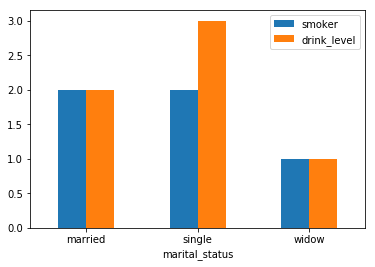

In [0]:
#plotting for marital status vs smoker n drinklevel.
F7rep.groupby('marital_status')['smoker','drink_level'].nunique().plot.bar(rot=0)

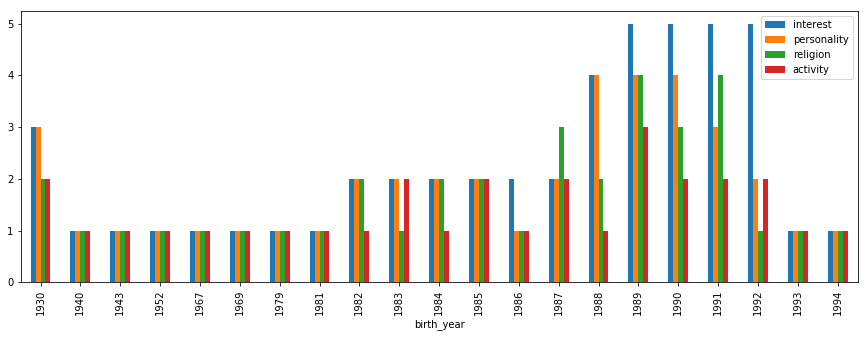

In [0]:
#plot to visualize user's personal info based on birthyear.
F7repplt=F7rep.groupby('birth_year')['interest','personality','religion','activity'].nunique().plot.bar(figsize=(15, 5))

In [0]:
#now performing label encoding to convert char to factors.
F7char=F7rep.select_dtypes(include=['object'])

encoder = LabelEncoder()
F7charLE = F7char.apply(encoder.fit_transform, axis=0)
F7charLE=F7charLE.drop(['userID'],axis=1)
F7charLE[['userID','latitude','longitude','birth_year','weight','height']]=F7rep[['userID','latitude','longitude','birth_year','weight','height']]
F7charLE.head()

,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,interest,personality,religion,activity,color,budget,userID,latitude,longitude,birth_year,weight,height
0,0,0,2,0,1,1,1,4,3,4,1,0,2,U1001,22.139997,-100.978803,1989,69,1.77
1,0,0,2,0,2,1,1,3,2,0,1,5,1,U1002,22.150087,-100.983325,1990,40,1.87
2,0,2,1,0,2,1,1,1,1,0,1,1,1,U1003,22.119847,-100.946527,1989,60,1.69
3,0,0,2,0,2,1,1,4,1,4,0,2,2,U1004,18.867000,-99.183000,1940,44,1.53
4,0,0,3,0,2,1,1,1,3,0,1,0,2,U1005,22.183477,-100.959891,1992,65,1.69


In [0]:
F8.head()

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,zip,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,?,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,78280,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rinc�n de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,78000,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,?,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,?,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none


In [0]:
F8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 21 columns):
placeID           130 non-null int64
latitude          130 non-null float64
longitude         130 non-null float64
the_geom_meter    130 non-null object
name              130 non-null object
address           130 non-null object
city              130 non-null object
state             130 non-null object
country           130 non-null object
fax               130 non-null object
zip               130 non-null object
alcohol           130 non-null object
smoking_area      130 non-null object
dress_code        130 non-null object
accessibility     130 non-null object
price             130 non-null object
url               130 non-null object
Rambience         130 non-null object
franchise         130 non-null object
area              130 non-null object
other_services    130 non-null object
dtypes: float64(2), int64(1), object(18)
memory usage: 21.4+ KB


In [0]:
#replacing unknown value with Nan.
F8rep=F8.replace('?', np.nan)

In [0]:
#now we are finding missing value cnt n perct for all variables.
mss=F8rep.isnull().sum()
columns = F8rep.columns
percent_missing = F8rep.isnull().sum() * 100 / len(F8rep)
missing_value_F8rep = pd.DataFrame({'missing_cnt':mss,
                                 'percent_missing': percent_missing})
missing_value_F8rep

,missing_cnt,percent_missing
placeID,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
the_geom_meter,0,0.000000
name,0,0.000000
address,27,20.769231
city,18,13.846154
state,18,13.846154
country,28,21.538462
fax,130,100.000000


In [0]:
#dropping columns with more than 50% missing values
F8new=F8rep.drop(['fax','zip','url'],axis=1)
#and replacing remaining colvalues with mode
for column in F8new.columns:
    F8new[column].fillna(F8new[column].mode()[0], inplace=True)

### Since some variables contains dirty values, we are going to perform data cleaning on those variables.

In [0]:
#clean n cnt of city
F8new.city=F8new.city.apply(lambda x: x.lower())
F8new.city=F8new.city.apply(lambda x:''.join([i for i in x 
                            if i not in string.punctuation]))

F8new.city.value_counts()

san luis potosi     87
cuernavaca          16
victoria            10
jiutepec             4
slp                  3
soledad              2
ciudad victoria      2
victoria             2
cd victoria          2
san luis potos       1
san luis potosi      1
Name: city, dtype: int64

In [0]:
#replacing city with unique. 
F8new['city']=F8new['city'].replace(['san luis potos','san luis potosi','slp','san luis potosi '],'san luis potosi' )
F8new['city']=F8new['city'].replace(['victoria','cd victoria','victoria '],'ciudad victoria' )
F8new.city.value_counts()

san luis potosi    92
cuernavaca         16
ciudad victoria    16
jiutepec            4
soledad             2
Name: city, dtype: int64

In [0]:
#clean n cnt of state
F8new.state=F8new.state.apply(lambda x: x.lower())
F8new.state=F8new.state.apply(lambda x:''.join([i for i in x 
                            if i not in string.punctuation]))

F8new.state.value_counts()

slp                73
morelos            20
san luis potosi    18
tamaulipas         16
mexico              2
san luis potos      1
Name: state, dtype: int64

In [0]:
#replacing state with unique.
F8new['state']=F8new['state'].replace(['san luis potos','san luis potosi','slp'],'san luis potosi' )
F8new.state.value_counts()

san luis potosi    92
morelos            20
tamaulipas         16
mexico              2
Name: state, dtype: int64

In [0]:
#clean n cnt of country
F8new.country=F8new.country.apply(lambda x: x.lower())
F8new.country=F8new.country.apply(lambda x:''.join([i for i in x 
                            if i not in string.punctuation]))

F8new.country.value_counts()

mexico    130
Name: country, dtype: int64

In [0]:
#label encoding
F8char=F8new.select_dtypes(include=['object'])
F8charLE = F8char.apply(encoder.fit_transform, axis=0)
F8charLE[['placeID','latitude','longitude']]=F8new[['placeID','latitude','longitude']]
F8charLE.head()

,the_geom_meter,name,address,city,state,country,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services,placeID,latitude,longitude
0,66,29,62,1,1,0,1,0,2,1,2,0,0,0,1,134999,18.915421,-99.184871
1,13,119,92,3,2,0,1,0,2,0,1,0,0,1,1,132825,22.147392,-100.983092
2,53,18,73,3,2,0,2,2,2,2,2,0,0,1,1,135106,22.149709,-100.976093
3,48,114,88,0,3,0,1,0,2,0,1,0,1,0,1,132667,23.752697,-99.163359
4,69,101,94,0,3,0,1,3,2,0,2,0,1,0,1,132613,23.752903,-99.165076


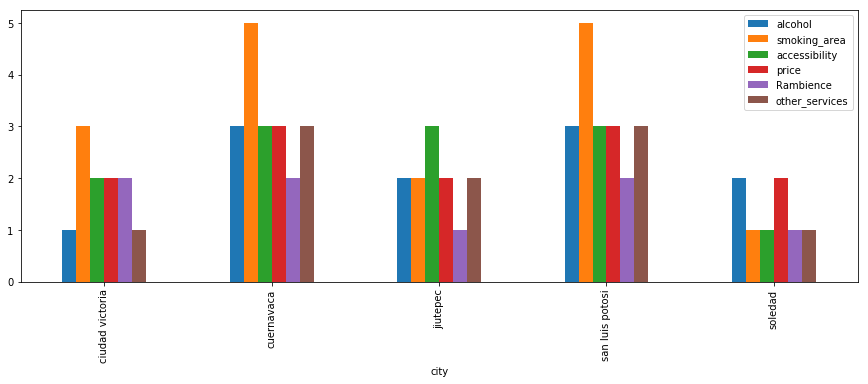

In [0]:
#plot for facilities provided by Restaurants based on city.
F8newplt=F8new.groupby('city')['alcohol','smoking_area','accessibility','price','Rambience','other_services'].nunique().plot.bar(figsize=(15,5))



## Producing Map location for the Restaurants


In [0]:
address = 'Mexico'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 19.4326009, -99.1333416.


In [0]:
# create map of Mexico using latitude and longitude values
map_mexico = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, city, area in zip(F8charLE['latitude'], F8charLE['longitude'], F8charLE['city'], F8charLE['area']):
    label = '{}, {}'.format(city, area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_mexico)  
    
map_mexico